In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os

2025-06-03 17:47:28.833882: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-03 17:47:28.841069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748983648.849875 1830923 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748983648.852359 1830923 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-03 17:47:28.861415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
usar_somente_CPU = True #Deixar True ou False

if usar_somente_CPU:
    tf.config.set_visible_devices([], 'GPU')
    print("Dispositivos visíveis:", tf.config.get_visible_devices())

Dispositivos visíveis: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
# Garantir reprodutibilidade total
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [5]:
df = pd.read_csv('../data_per_month.csv')
df = df['Total Renewable Energy']

In [6]:
# Função para criar janelas de dados
def create_windows(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Função para remover outliers
def remove_outliers(X, y, threshold=3):
    mask_X = np.all(np.abs(X - np.mean(X, axis=0)) <= threshold * np.std(X, axis=0), axis=1)
    mask_y = np.abs(y - np.mean(y)) <= threshold * np.std(y)
    mask = mask_X & mask_y
    return X[mask], y[mask]

In [7]:
# Criar janelas de tamanho 12
window_size = 12
X, y = create_windows(df, window_size)

# Remover outliers
X_clean, y_clean = remove_outliers(X, y)

# Dividir em conjuntos de treino, validação e teste
train_size = int(len(X_clean) * 0.7)
val_size = int(len(X_clean) * 0.15)

X_train, y_train = X_clean[:train_size], y_clean[:train_size]
X_val, y_val = X_clean[train_size:train_size + val_size], y_clean[train_size:train_size + val_size]
X_test, y_test = X_clean[train_size + val_size:], y_clean[train_size + val_size:]

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
df

0      219.840
1      197.330
2      218.687
3      209.330
4      215.982
        ...   
608    499.536
609    532.762
610    519.638
611    533.819
612    521.761
Name: Total Renewable Energy, Length: 613, dtype: float64

In [9]:
X_train_scaled.shape[1]

12

Epoch 1/3200


2025-06-03 17:47:30.128109: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52556.4375 - mae: 228.2690  
Epoch 2/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52237.9922 - mae: 227.5627 
Epoch 3/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51904.5469 - mae: 226.8210 
Epoch 4/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51544.5430 - mae: 226.0168 
Epoch 5/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51143.5547 - mae: 225.1176 
Epoch 6/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50691.5586 - mae: 224.0993 
Epoch 7/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50177.8828 - mae: 222.9362 
Epoch 8/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49592.2266 - mae: 221.6020 
Epoch 9/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48923.7852 - mae: 220.0689 
Epoch 10/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48158.8828 - mae: 218.3008 
Epoch 11/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47280.5859 - mae: 216.2520 
Epoch 12/3200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46268

2025-06-03 17:48:49.179425: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74860.5859 - mae: 268.9773  
Epoch 2/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74191.6875 - mae: 267.5444 
Epoch 3/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73378.8203 - mae: 265.7866 
Epoch 4/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72376.7656 - mae: 263.5946 
Epoch 5/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71129.5547 - mae: 260.8195 
Epoch 6/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69544.2812 - mae: 257.2126 
Epoch 7/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67488.0156 - mae: 252.4011 
Epoch 8/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64890.9727 - mae: 246.0919 
Epoch 9/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61661.3594 - mae: 237.8132 
Epoch 10/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57785.5859 - mae: 227.1066 
Epoch 11/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53384.2148 - mae: 213.6356 
Epoch 12/3200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48732

2025-06-03 17:50:14.863374: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87106.9219 - mae: 291.3374  
Epoch 2/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86826.0938 - mae: 290.7686 
Epoch 3/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86683.7031 - mae: 290.4944 
Epoch 4/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86548.1406 - mae: 290.2514 
Epoch 5/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86344.7188 - mae: 289.8822 
Epoch 6/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86046.6875 - mae: 289.3371 
Epoch 7/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85578.0859 - mae: 288.4683 
Epoch 8/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 84850.8359 - mae: 287.1040 
Epoch 9/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 83747.2891 - mae: 285.0191 
Epoch 10/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81778.7578 - mae: 281.1272 
Epoch 11/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78656.3516 - mae: 274.6363 
Epoch 12/3200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0

2025-06-03 17:51:51.469196: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92346.2422 - mae: 299.6690  
Epoch 2/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92135.7969 - mae: 299.2993 
Epoch 3/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 91932.7344 - mae: 298.9286
Epoch 4/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 91553.3047 - mae: 298.2387 
Epoch 5/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90721.2422 - mae: 296.6953 
Epoch 6/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 89027.3203 - mae: 293.4630 
Epoch 7/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 86124.8750 - mae: 287.8778
Epoch 8/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81375.1016 - mae: 278.4564 
Epoch 9/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74216.8750 - mae: 263.4095 
Epoch 10/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64559.5352 - mae: 240.9948 
Epoch 11/3200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 53166.1758 - mae: 210.0321
Epoch 12/3200
18/18 ━━━━━━━━━━━━━━━━━━━

2025-06-03 17:53:35.989556: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 91720.4453 - mae: 299.0447
Epoch 2/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 91477.9531 - mae: 298.6368
Epoch 3/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 90883.6172 - mae: 297.5442
Epoch 4/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 89715.5625 - mae: 295.3628
Epoch 5/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 87265.3828 - mae: 290.6647
Epoch 6/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 82364.3359 - mae: 280.7025
Epoch 7/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 74035.2500 - mae: 261.8795
Epoch 8/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 62999.6172 - mae: 231.6633
Epoch 9/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 52078.4688 - mae: 208.3294
Epoch 10/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 42359.4258 - mae: 192.8715
Epoch 11/3200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 32561.8926 - mae: 166.8203
Epoch 12/3200
22/22 ━━━━━━━━━━━━

2025-06-03 17:55:24.289222: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 96155.5000 - mae: 306.9268 
Epoch 2/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95676.3594 - mae: 306.0527 
Epoch 3/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 94981.2891 - mae: 304.8510
Epoch 4/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 93479.7969 - mae: 302.2429
Epoch 5/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 90303.7891 - mae: 296.5515
Epoch 6/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 84335.5703 - mae: 285.2274
Epoch 7/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 74518.1641 - mae: 264.4229
Epoch 8/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 61464.5586 - mae: 231.9550
Epoch 9/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 48195.0000 - mae: 205.7254
Epoch 10/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 36276.2656 - mae: 177.3106
Epoch 11/3200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 26703.3320 - mae: 147.6216
Epoch 12/3200
27/27 ━━━━━━━━━━━━

2025-06-03 17:57:21.268125: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93777.3828 - mae: 302.5628 - val_loss: 101574.0703 - val_mae: 318.0582
Epoch 5/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91065.6953 - mae: 298.0751 - val_loss: 98438.6875 - val_mae: 313.1762
Epoch 6/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86494.7656 - mae: 290.2325 - val_loss: 93461.3516 - val_mae: 305.2104
Epoch 7/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79336.2266 - mae: 277.2585 - val_loss: 86019.0391 - val_mae: 292.7495
Epoch 8/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69097.1797 - mae: 257.1108 - val_loss: 75741.7812 - val_mae: 274.2395
Epoch 9/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56089.0078 - mae: 227.8788 - val_loss: 63251.4648 - val_mae: 249.0391
Epoch 10/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42270.7852 - mae: 189.3886 - val_loss: 50411.6016 - val_mae: 218.4057
Epoch 11/3200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30971.8789 - mae: 152.0482 - val_loss: 4

2025-06-03 18:00:10.495728: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


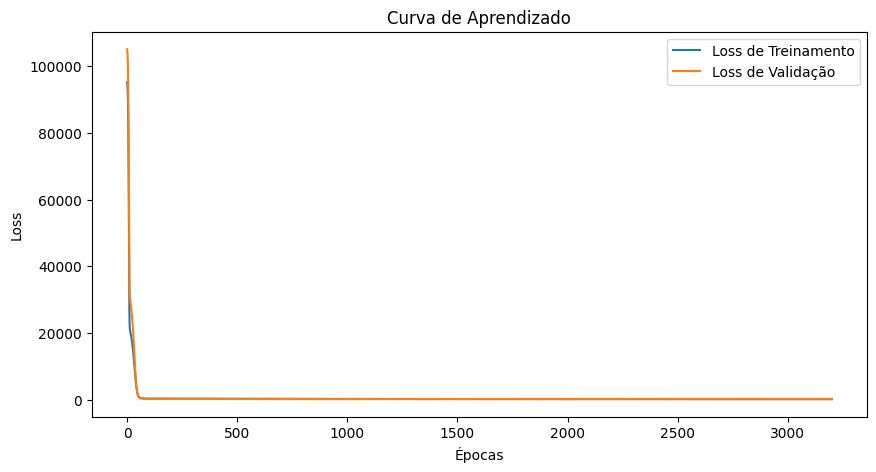

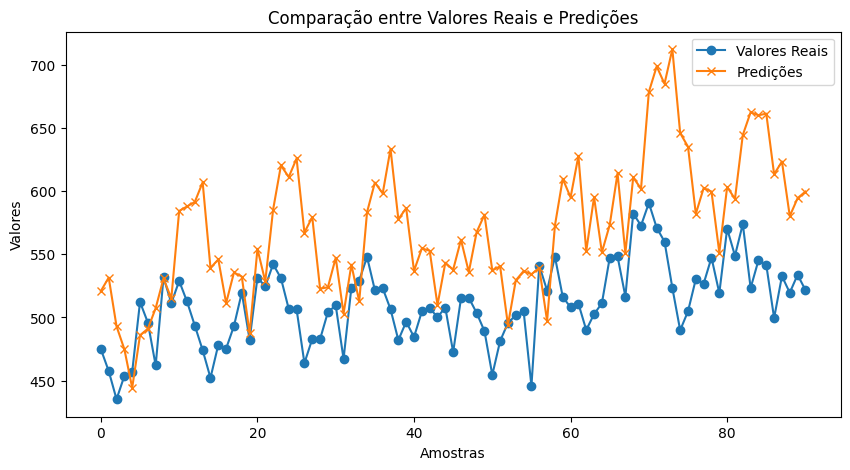

In [ ]:
# Função para criar o modelo com regularização
def create_model(neurons=24, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(neurons, activation='relu'),
        # Dropout(dropout_rate),
        Dense(neurons, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    
    optimizer_instance = Adam() if optimizer == 'adam' else RMSprop()
    model.compile(optimizer=optimizer_instance, loss='mse', metrics=['mae'])
    return model

tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []

optimizer = 'adam'
batch_size = 16
epochs = 3200
neurons = 24
hidden_layers = 2

for train_index, val_index in tscv.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model(neurons=neurons, optimizer=optimizer)

    model.fit(X_train_fold,
        y_train_fold,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1)

    y_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
    mse_scores.append(mse)


print("MSE médio nos folds:", np.mean(mse_scores))

final_model = create_model(neurons=neurons, optimizer=optimizer)

final_model.fit(X_train_scaled, y_train, epochs=epochs,
                    batch_size=batch_size, verbose=1)

# Criar e treinar o modelo
model = create_model(optimizer=optimizer)
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Calcular métricas
eval_results = model.evaluate(X_test_scaled, y_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Loss: {eval_results[0]}, MAE: {eval_results[1]}")
print(f"R²: {r2}, RMSE: {rmse}")

# Plot da curva de aprendizado
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Curva de Aprendizado')
plt.show()

# Comparação entre valores reais e previstos
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Predições', marker='x')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.title('Comparação entre Valores Reais e Predições')
plt.show()
